# Taller 2 segundo corte

# Presentado por Juan Camilo Florez y Brayan Duque

Un movimiento armónico con amortiguamiento viene dado por

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.

condiciones iniciales x(0) = 1 y v(0) = 0

In [ ]:
#Presentado por Juan Camilo Florez y Brayan Duque

Respuesta A

El orden de la Ecuacion es de segundo Orden (Orden 2)

La Funcion:
    

$F\left(t,x,\frac{dx}{dt}\right)=  \frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x $
    
$F\left(t,x,\frac{dx}{dt}\right)= a + \gamma v + \omega_{0}^{2}x $

a = aceleración.

v = velocidad.

x = posición.



Respuesta B

Para determinar por amortiguamiento se usa: 
$F(t,x,v)= - \gamma v - \omega_{0}^{2}x $

donde el amortiguamiento debil es $\gamma\ < 2\omega_{0}$ y el amortiguamiento critico $\gamma\ = 2\omega_{0}$

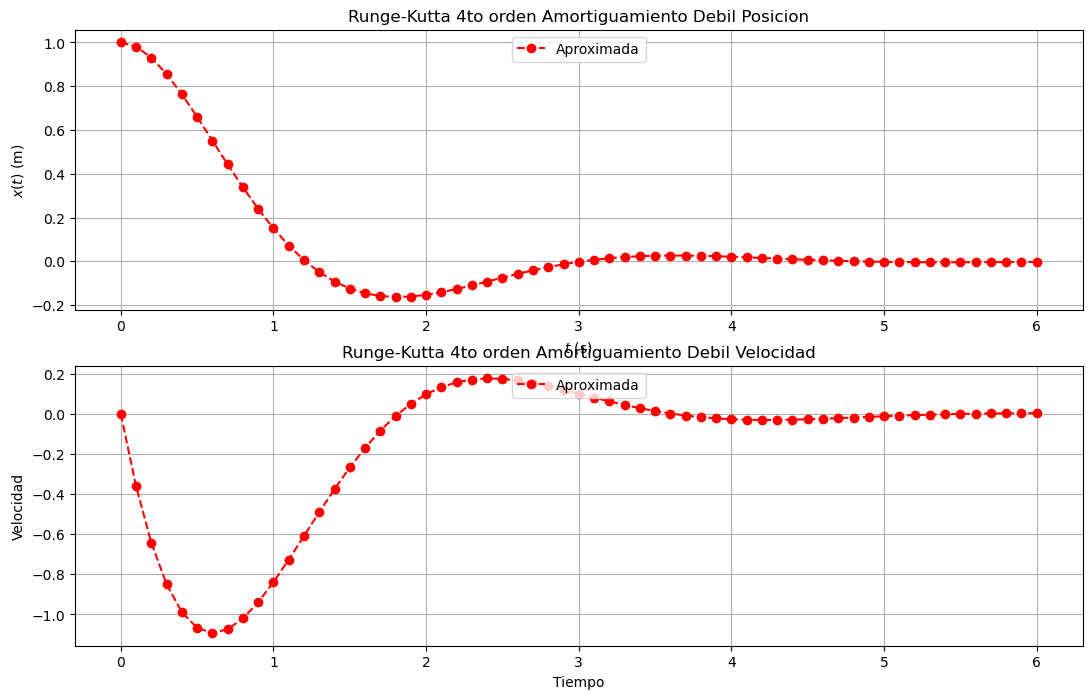

In [43]:
import numpy as np
import matplotlib.pyplot as plt

w=2
lamb = w #amortiguamento debil y<2w

F1_oa = lambda t, v_oa, x_oa: (-lamb*v_oa) - (pow(w,2)*x_oa)


h = 0.1 # Step size
t = np.arange(0, 6+h, h) # Numerical grid
x0_oa = 1
v0_oa = 0
# Initial Conditions

x_oa = np.zeros(len(t))
v_oa = np.zeros(len(t))

x_oa[0] = x0_oa
v_oa[0] = v0_oa

for i in range(0, len(t) - 1):
    k1v = h*F1_oa(t[i], v_oa[i], x_oa[i])
    k1x = h*v_oa[i]
    k2v = h*F1_oa(t[i] + 0.5*h, v_oa[i] + 0.5*k1v, x_oa[i] + 0.5*k1x)
    k2x = h*(v_oa[i] + 0.5*k1v)
    k3v = h*F1_oa(t[i] + 0.5*h, v_oa[i] + 0.5*k2v, x_oa[i] + 0.5*k2x)
    k3x = h*(v_oa[i] + 0.5*k2v)
    k4v = h*F1_oa(t[i] + h, v_oa[i] + k3v, x_oa[i] + k3x)
    k4x = h*(v_oa[i] + k3v)
    v_oa[i + 1] = v_oa[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
    x_oa[i + 1] = x_oa[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

plt.figure(figsize = (13, 8))
plt.subplot(2, 1, 1)
plt.plot(t, x_oa, 'ro--', label='Aproximada')
plt.title('Runge-Kutta 4to orden Amortiguamiento Debil Posicion')
plt.xlabel('$t$ (s)')
plt.ylabel('$x(t)$ (m)')
plt.grid()
plt.legend(loc='upper center')

plt.subplot(2, 1, 2)
plt.plot(t, v_oa, 'ro--', label='Aproximada')
plt.title('Runge-Kutta 4to orden Amortiguamiento Debil Velocidad')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.grid()
plt.legend(loc='upper center')


plt.show()

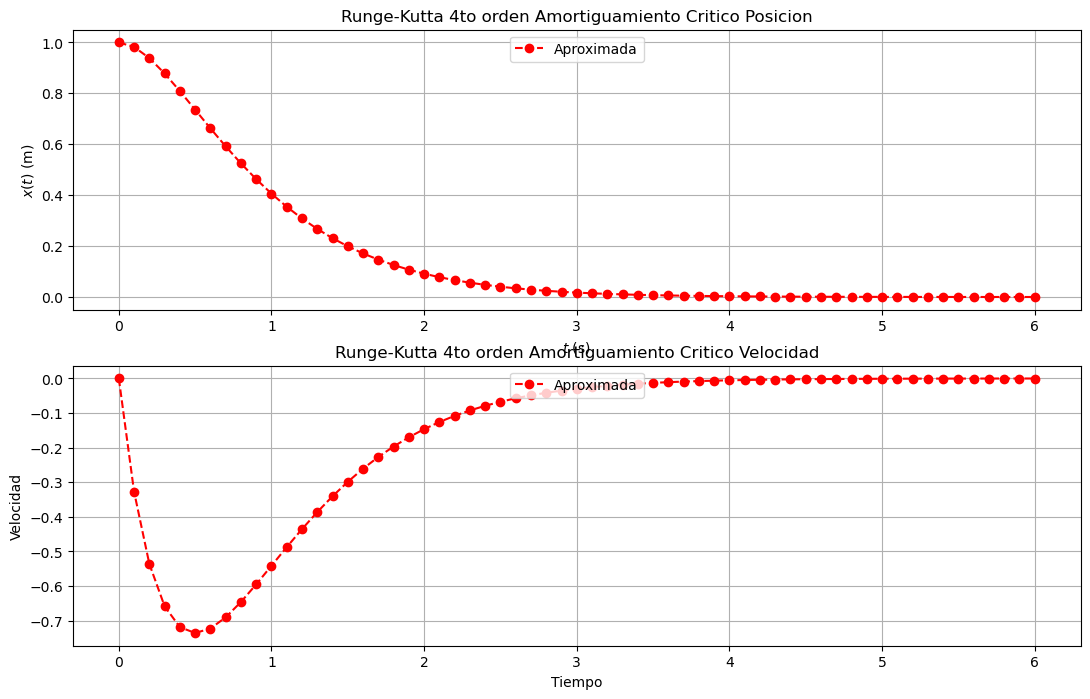

In [44]:
import numpy as np
import matplotlib.pyplot as plt

w=2
lamb = 2*w #amortiguamento critico y = 2w

F1_oa = lambda t, v_oa, x_oa: (-lamb*v_oa) - (pow(w,2)*x_oa)


h = 0.1 # Step size
t = np.arange(0, 6+h, h) # Numerical grid
x0_oa = 1
v0_oa = 0
# Initial Conditions

x_oa = np.zeros(len(t))
v_oa = np.zeros(len(t))

x_oa[0] = x0_oa
v_oa[0] = v0_oa

for i in range(0, len(t) - 1):
    k1v = h*F1_oa(t[i], v_oa[i], x_oa[i])
    k1x = h*v_oa[i]
    k2v = h*F1_oa(t[i] + 0.5*h, v_oa[i] + 0.5*k1v, x_oa[i] + 0.5*k1x)
    k2x = h*(v_oa[i] + 0.5*k1v)
    k3v = h*F1_oa(t[i] + 0.5*h, v_oa[i] + 0.5*k2v, x_oa[i] + 0.5*k2x)
    k3x = h*(v_oa[i] + 0.5*k2v)
    k4v = h*F1_oa(t[i] + h, v_oa[i] + k3v, x_oa[i] + k3x)
    k4x = h*(v_oa[i] + k3v)
    v_oa[i + 1] = v_oa[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
    x_oa[i + 1] = x_oa[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

plt.figure(figsize = (13, 8))
plt.subplot(2, 1, 1)
plt.plot(t, x_oa, 'ro--', label='Aproximada')
plt.title('Runge-Kutta 4to orden Amortiguamiento Critico Posicion')
plt.xlabel('$t$ (s)')
plt.ylabel('$x(t)$ (m)')
plt.grid()
plt.legend(loc='upper center')

plt.subplot(2, 1, 2)
plt.plot(t, v_oa, 'ro--', label='Aproximada')
plt.title('Runge-Kutta 4to orden Amortiguamiento Critico Velocidad')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.grid()
plt.legend(loc='upper center')


plt.show()